# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [165]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
#     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
       

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City '" + city.title() +" 'not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | kavieng
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | kwidzyn
Processing Record 8 of Set 1 | taolanaro
City 'Taolanaro 'not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | belushya guba
City 'Belushya Guba 'not found. Skipping...
Processing Record 13 of Set 1 | djambala
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | puerto del rosario
Processing Record 16 of Set 1 | sola
Processing Record 17 of Set 1 | olot
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | faya
Processing Record 20 of Set 1 | presidente medici
Processing Record 21 of Set 1 | cockburn t

Processing Record 31 of Set 4 | kodiak
Processing Record 32 of Set 4 | paita
Processing Record 33 of Set 4 | uruzgan
Processing Record 34 of Set 4 | simpang empat
Processing Record 35 of Set 4 | mahadday weyne
City 'Mahadday Weyne 'not found. Skipping...
Processing Record 36 of Set 4 | acarau
Processing Record 37 of Set 4 | bahia blanca
Processing Record 38 of Set 4 | cantagallo
Processing Record 39 of Set 4 | cidreira
Processing Record 40 of Set 4 | zaraza
Processing Record 41 of Set 4 | westport
Processing Record 42 of Set 4 | florianopolis
Processing Record 43 of Set 4 | talakan
Processing Record 44 of Set 4 | broome
Processing Record 45 of Set 4 | ahipara
Processing Record 46 of Set 4 | chernyshevskiy
Processing Record 47 of Set 4 | codrington
Processing Record 48 of Set 4 | tuktoyaktuk
Processing Record 49 of Set 4 | arraial do cabo
Processing Record 0 of Set 5 | salta
Processing Record 1 of Set 5 | baoding
Processing Record 2 of Set 5 | steamboat springs
Processing Record 3 of Se

Processing Record 20 of Set 8 | iberia
Processing Record 21 of Set 8 | revda
Processing Record 22 of Set 8 | rio brilhante
Processing Record 23 of Set 8 | yialos
City 'Yialos 'not found. Skipping...
Processing Record 24 of Set 8 | dauphin
Processing Record 25 of Set 8 | san cristobal
Processing Record 26 of Set 8 | aranos
Processing Record 27 of Set 8 | las lomas
Processing Record 28 of Set 8 | barra patuca
Processing Record 29 of Set 8 | chapais
Processing Record 30 of Set 8 | namtsy
Processing Record 31 of Set 8 | abu samrah
Processing Record 32 of Set 8 | shizuishan
Processing Record 33 of Set 8 | sao luiz gonzaga
Processing Record 34 of Set 8 | canto do buriti
Processing Record 35 of Set 8 | luena
Processing Record 36 of Set 8 | otofuke
Processing Record 37 of Set 8 | ugoofaaru
Processing Record 38 of Set 8 | tiarei
Processing Record 39 of Set 8 | adrar
Processing Record 40 of Set 8 | griffith
Processing Record 41 of Set 8 | sergeyevka
Processing Record 42 of Set 8 | zharkent
Proce

Processing Record 2 of Set 12 | acapulco
Processing Record 3 of Set 12 | kaniama
Processing Record 4 of Set 12 | kieta
Processing Record 5 of Set 12 | tammisaari
Processing Record 6 of Set 12 | choya
Processing Record 7 of Set 12 | lander
Processing Record 8 of Set 12 | zacualtipan
Processing Record 9 of Set 12 | tolaga bay
Processing Record 10 of Set 12 | minas
Processing Record 11 of Set 12 | blackwater
Processing Record 12 of Set 12 | la ronge
Processing Record 13 of Set 12 | fukue
Processing Record 14 of Set 12 | cap-chat
Processing Record 15 of Set 12 | kazalinsk
City 'Kazalinsk 'not found. Skipping...
Processing Record 16 of Set 12 | hunza
City 'Hunza 'not found. Skipping...
Processing Record 17 of Set 12 | skibbereen
Processing Record 18 of Set 12 | kruisfontein
Processing Record 19 of Set 12 | bintulu
Processing Record 20 of Set 12 | campanha
Processing Record 21 of Set 12 | abalak
Processing Record 22 of Set 12 | giyon
Processing Record 23 of Set 12 | tocopilla
Processing Reco

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hasaki,35.7333,140.8333,12.90,60,100,9.88,JP,1680434877
1,Port Alfred,-33.5906,26.8910,24.54,82,0,4.47,ZA,1680434877
2,Kapaa,22.0752,-159.3190,24.18,87,75,3.09,US,1680434877
3,Kavieng,-2.5744,150.7967,27.65,79,72,4.58,PG,1680434877
4,Avarua,-21.2078,-159.7750,26.03,78,75,3.09,CK,1680434877


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Hasaki,35.7333,140.8333,12.90,60,100,9.88,JP,1680434877
1,Port Alfred,-33.5906,26.8910,24.54,82,0,4.47,ZA,1680434877
2,Kapaa,22.0752,-159.3190,24.18,87,75,3.09,US,1680434877
3,Kavieng,-2.5744,150.7967,27.65,79,72,4.58,PG,1680434877
4,Avarua,-21.2078,-159.7750,26.03,78,75,3.09,CK,1680434877


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

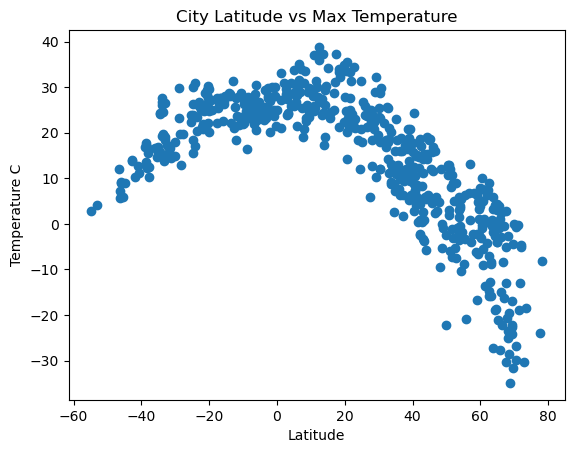

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature C")
plt.title("City Latitude vs Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

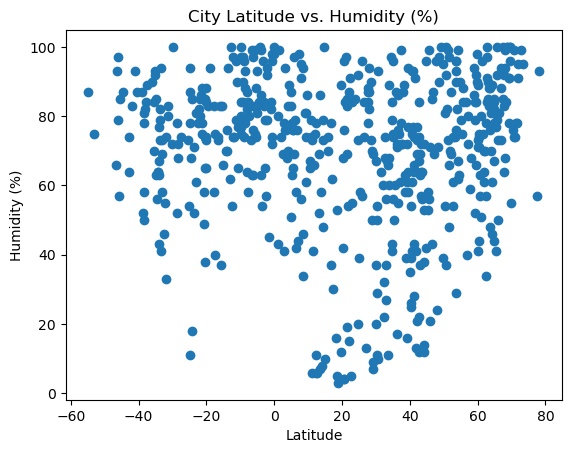

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

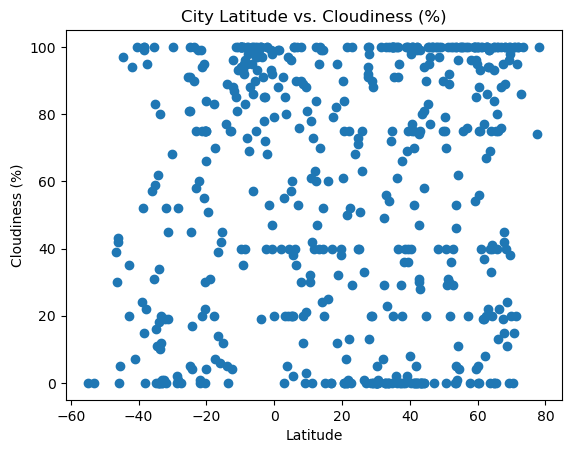

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

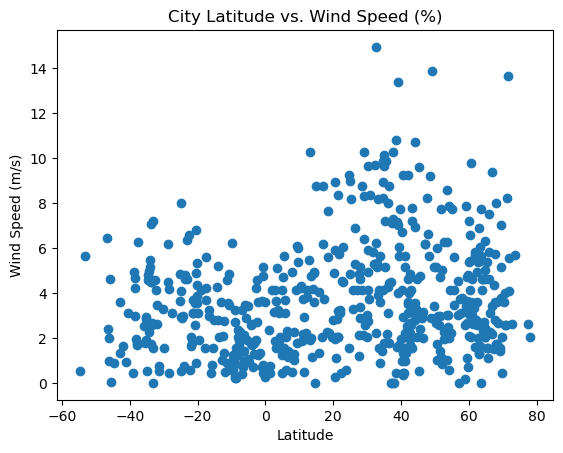

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (%)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [160]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere):
    # Regression caluculation
    (slope, intercept, rvalue, pvalue, srderr) = linregress(x_values, y_values)
    
    # Linean Regression line calucation
    regress_values = (slope * x_values) + intercept
    line_eq = f"y = {round(slope ,2)}x +{round(intercept ,2)}"
    print(f" The rvalue is: {round(rvalue,2)}")
    
    # create plots
    fig, axl = plt.subplots(figsize=(8,6))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="red")
   
    # Show equation on scatter plot
   
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} Hemisphere - {x_label} verse {y_label} Linear Regression")
#     plt.annotate(line_eq, text_coord, color="red")

In [177]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.sample(15)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
90,Juru,5.3120,100.4423,28.99,78,20,1.54,MY,1680434905
411,Sun Valley,39.5963,-119.7760,6.38,64,75,7.72,US,1680434969
543,Klaksvik,62.2266,-6.5890,7.51,70,8,2.81,FO,1680435065
357,Griffith,41.5284,-87.4237,0.50,91,0,2.06,US,1680434996
214,Hojai,26.0000,92.8667,25.81,57,63,3.30,IN,1680434961
538,Gbarnga,6.9956,-9.4722,34.01,44,53,1.32,LR,1680435063
275,Ranau,5.9538,116.6641,21.56,97,100,0.56,MY,1680434979
88,Suez,29.9737,32.5263,25.36,20,0,3.03,EG,1680434904
400,Loveland,40.3978,-105.0750,12.58,26,0,6.69,US,1680434852


In [101]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
185,Buala,-8.1450,159.5921,26.76,82,95,1.23,SB,1680434952
366,Maltahohe,-24.8333,16.9833,29.93,11,5,4.10,NaN,1680434997
38,East London,-33.0153,27.9116,26.52,69,0,7.20,ZA,1680434878
130,Ancud,-41.8697,-73.8203,10.31,83,94,1.64,CL,1680434926
536,Saurimo,-9.6608,20.3916,23.69,75,94,1.22,AO,1680435062
118,Ariquemes,-9.9133,-63.0408,21.92,100,100,0.58,BR,1680434920
58,Atuona,-9.8000,-139.0333,27.09,77,100,6.24,PF,1680434892
223,Campo Verde,-20.4167,-54.0667,22.09,85,0,0.90,BR,1680434964
182,Salta,-24.7859,-65.4117,18.33,94,100,0.51,AR,1680434951


###  Temperature vs. Latitude Linear Regression Plot

 The rvalue is: -0.86


TypeError: 'tuple' object is not callable

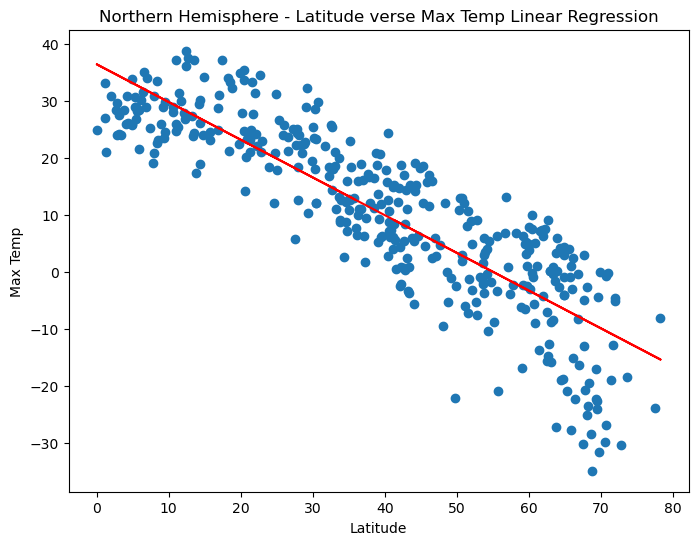

In [168]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Northern")
plt.annotate(line_eq, (10, 0), color="red")
plt.show()

TypeError: 'tuple' object is not callable

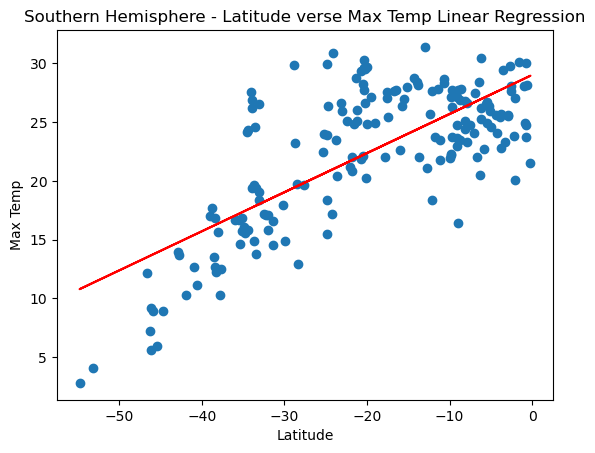

In [120]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Southern", (-10, 10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

 The rvalue is: 0.24


TypeError: 'tuple' object is not callable

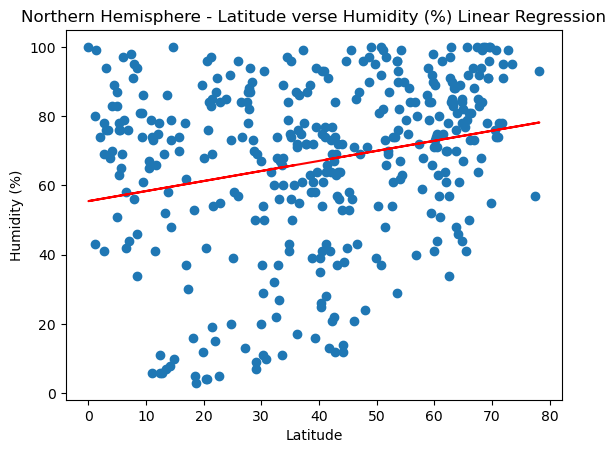

In [130]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern", (40,10))
plt.show()

In [158]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern", (-10, 50))
plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 380 and the array at index 1 has size 179

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

 The rvalue is: 0.15


TypeError: 'tuple' object is not callable

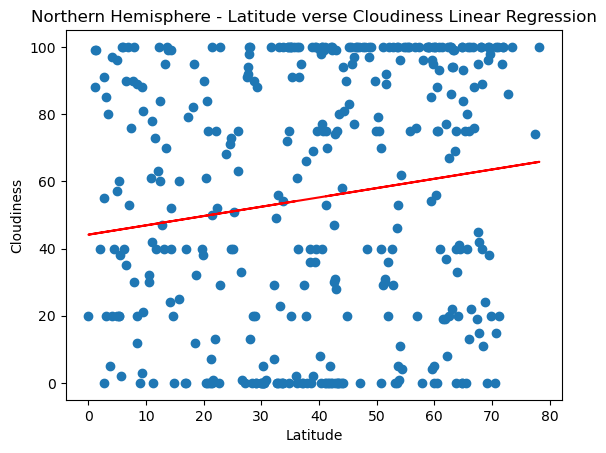

In [136]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Northern", (40,10))
plt.show()

In [138]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Southern", (-50, 10))
plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 380 and the array at index 1 has size 179

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

 The rvalue is: 0.06


TypeError: 'tuple' object is not callable

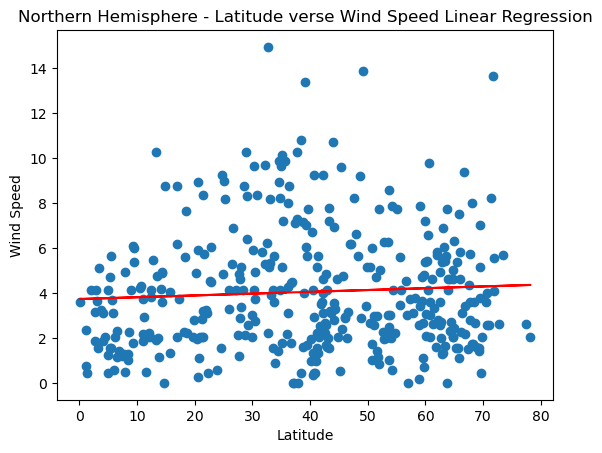

In [140]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", "Northern", (10, 12))
plt.show()

In [142]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed)", "Southern", (-50, 12))
plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 380 and the array at index 1 has size 179

**Discussion about the linear relationship:** YOUR RESPONSE HERE